<a href="https://colab.research.google.com/github/Viroslav/Projects/blob/main/Beeline_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/rsouza/mlcourse_open/master/data/credit_scoring_train.csv', sep = ',')
df_test = pd.read_csv('https://raw.githubusercontent.com/rsouza/mlcourse_open/master/data/credit_scoring_test.csv', sep = ',')
df_sample = pd.read_csv("https://raw.githubusercontent.com/rsouza/mlcourse_open/master/data/credit_scoring_sample.csv", sep = ';')

In [ ]:
df_train.head()

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0


In [ ]:
df_test.head()

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit
0,75000,0.488558,39.2,7,2,2.0,0,0,2866.926559,0.369443
1,75001,0.132810,42.3,8,0,1.0,4,0,4303.412944,1.028329
2,75002,1784.812905,51.5,5,1,0.0,0,0,NaN,0.081461
3,75003,0.538571,57.1,30,2,0.0,0,0,7672.294930,0.485850
4,75004,0.098539,70.1,3,0,0.0,0,0,4507.010360,0.004258


Признаки клиентов банка:
<br>
<br>client_id - ID клиента (неотрицательное целое число)
<br>Age - возраст (вещественный)
<br>Income - месячный доход (вещественный)
<br>BalanceToCreditLimit - отношение баланса на кредитной карте к лимту по кредиту (вещественный)
<br>DIR - Debt-to-income Ratio (вещественный)
<br>NumLoans - число заемов и кредитных линий
<br>NumRealEstateLoans - число ипотек и заемов, связанных с недвижимостью (натуральное число)
<br>NumDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
<br>Num30-59Delinquencies - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)
<br>Num60-89Delinquencies - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)
<br>Delinquent90 - были ли просрочки выплат по кредиту более 90 дней (бинарный) - имеется только в обучающей выборке

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,75000.0,37499.500000,21650.779432,0.0,18749.750000,37499.500000,56249.250000,7.499900e+04
DIR,75000.0,353.260293,2117.237432,0.0,0.176022,0.366848,0.862650,3.326003e+05
Age,75000.0,52.595605,14.869729,21.0,41.300000,52.200000,63.100000,1.098000e+02
NumLoans,75000.0,8.449760,5.156440,0.0,5.000000,8.000000,11.000000,5.600000e+01
NumRealEstateLoans,75000.0,1.016693,1.124019,0.0,0.000000,1.000000,2.000000,3.200000e+01
NumDependents,73084.0,0.755966,1.108119,0.0,0.000000,0.000000,1.000000,2.000000e+01
Num30-59Delinquencies,75000.0,0.428320,4.276439,0.0,0.000000,0.000000,0.000000,9.800000e+01
Num60-89Delinquencies,75000.0,0.248000,4.239486,0.0,0.000000,0.000000,0.000000,9.800000e+01
Income,60153.0,6740.059287,14228.754880,0.0,3421.353782,5424.552473,8291.517816,1.805573e+06
BalanceToCreditLimit,75000.0,6.276196,267.743321,0.0,0.029703,0.153720,0.560638,5.087387e+04


In [ ]:
df_train.isna().sum()

client_id                    0
DIR                          0
Age                          0
NumLoans                     0
NumRealEstateLoans           0
NumDependents             1916
Num30-59Delinquencies        0
Num60-89Delinquencies        0
Income                   14847
BalanceToCreditLimit         0
Delinquent90                 0
dtype: int64

In [ ]:
df_test.isna().sum()

client_id                    0
DIR                          0
Age                          0
NumLoans                     0
NumRealEstateLoans           0
NumDependents             2008
Num30-59Delinquencies        0
Num60-89Delinquencies        0
Income                   14884
BalanceToCreditLimit         0
dtype: int64

In [ ]:
df_train['NumDependents'].fillna(df_train['NumDependents'].median(), inplace = True)
df_train['Income'].fillna(df_train['Income'].median(), inplace = True)

df_test['NumDependents'].fillna(df_test['NumDependents'].median(), inplace = True)
df_test['Income'].fillna(df_test['Income'].median(), inplace = True)

In [ ]:
#sns.pairplot(df_train)

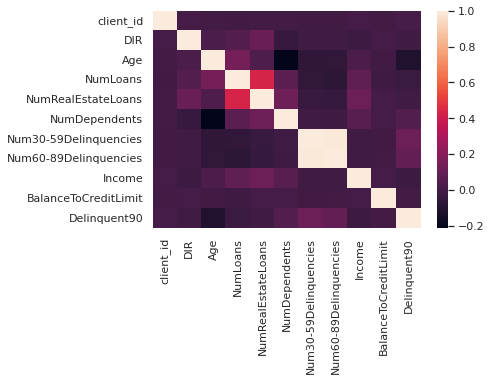

In [ ]:
sns.heatmap(df_train.corr())

In [ ]:
f"Кол-во объёктов класса 1: {df_train.query('Delinquent90 == 1').shape[0]}, Кол-во объёктов класса 0: {df_train.query('Delinquent90 == 0').shape[0]}"

'Кол-во объёктов класса 1: 5013, Кол-во объёктов класса 0: 69987'

Дисбаланс классов, также есть некоторые корреляции

Обучите дерево решений максимальной глубины 3, используйте параметр random_state=17 для воспроизводимости результатов.

In [ ]:
X_train = df_train.drop(['Delinquent90'], axis = 1)
y_train = df_train.Delinquent90

X_test = df_test

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 17)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [ ]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Delinquent90', index_label="client_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(75000, 
                                                  predicted_labels.shape[0] + 75000),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [ ]:

write_to_submission_file(tree.predict(X_test), 'credit_scoring_first_tree.csv')

Если предсказывать вероятности дефолта для клиентов тестовой выборки, результат будет намного лучше.

In [ ]:
tree_pred_probs = tree.predict_proba(X_test)[:, 1]

In [ ]:
write_to_submission_file(tree_pred_probs, 'credit_scoring_first_tree.csv')

GridSearchCV

In [ ]:
tree_params = {'max_depth': list(range(3, 8)), 
               'min_samples_leaf': list(range(5, 13))}

locally_best_tree = GridSearchCV(tree, param_grid=tree_params, n_jobs=-1, cv =5, verbose=1, return_train_score=True)
locally_best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12]},
             return_train_score=True, verbose=1)

In [ ]:
locally_best_tree.best_params_, locally_best_tree.best_score_

({'max_depth': 3, 'min_samples_leaf': 5}, 0.7877333333333333)

In [ ]:
tuned_tree_pred_probs = locally_best_tree.predict_proba(X_test)[:, 1]
write_to_submission_file(tuned_tree_pred_probs, 'credit_scoring_first_tree.csv')

RandomForest

In [ ]:
rf = RandomForestClassifier(random_state=17)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [ ]:
rf_pred_probs = rf.predict_proba(X_test)[:, 1]
write_to_submission_file(rf_pred_probs, 'credit_scoring_first_tree.csv')

In [ ]:
forest_params = {'max_features': np.linspace(.3, 1, 7)}

locally_best_rf = GridSearchCV(rf, param_grid=forest_params, n_jobs=-1, cv =5, verbose=1)

In [ ]:
locally_best_rf.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_features': array([0.3       , 0.41666667, 0.53333333, 0.65      , 0.76666667,
       0.88333333, 1.        ])},
             verbose=1)

In [ ]:
locally_best_rf.best_params_, round(locally_best_rf.best_score_, 3)

({'max_features': 1.0}, 0.761)

In [ ]:
tuned_forest_pred = locally_best_rf.predict_proba(X_test)[:,1]
write_to_submission_file(tuned_forest_pred, 'credit_scoring_first_tree.csv')

In [ ]:
locally_best_rf.best_estimator_.feature_importances_

array([0.14914234, 0.14287138, 0.12709936, 0.06909651, 0.02664968,
       0.03204808, 0.04084582, 0.08041147, 0.12803739, 0.20379796])

In [ ]:
pd.DataFrame(locally_best_rf.best_estimator_.feature_importances_, index = X_train.columns) \
.sort_values(by=0, ascending = False)

,0
BalanceToCreditLimit,0.203798
client_id,0.149142
DIR,0.142871
Income,0.128037
Age,0.127099
Num60-89Delinquencies,0.080411
NumLoans,0.069097
Num30-59Delinquencies,0.040846
NumDependents,0.032048
NumRealEstateLoans,0.026650


In [ ]:
df_train.columns

Index(['client_id', 'DIR', 'Age', 'NumLoans', 'NumRealEstateLoans',
       'NumDependents', 'Num30-59Delinquencies', 'Num60-89Delinquencies',
       'Income', 'BalanceToCreditLimit', 'Delinquent90'],
      dtype='object')

Обычно увеличение количества деревьев только улучшает результат. Так что напоследок обучите случайный лес из 300 деревьев с найденными лучшими параметрами. Это может занять несколько минут.

In [ ]:
final_forest = RandomForestClassifier(n_estimators=300, random_state = 17, max_features = 1.0)
final_forest.fit(X_train, y_train)
final_forest_pred = final_forest.predict_proba(X_train)[:, 1]


In [ ]:
write_to_submission_file(final_forest_pred, 'credit_scoring_final_forest.csv')